<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd

ruta_archivo = 'data/datos_clientes.csv'

# Cargar el archivo CSV en un DataFrame
datos= pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(datos.head())


   Id_Cliente  Genero  Edad   Ingreso  Puntaje_Gasto
0           1   Mujer    41  98115.05             39
1           2   Mujer    20  35458.14             75
2           3   Mujer    68  59872.08             55
3           4  Hombre    63  48508.93             51
4           5   Mujer    31  44431.11             54


(Utilice este espacio para describir su procedimiento)

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [2]:
# Utilice este espacio para escribir el código.
import matplotlib.pyplot as plt
import seaborn as sns

datos.describe(include='all')

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Mujer,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60624.446600,50.200000
std,57.879185,NaN,13.969007,26262.903416,25.823522
min,1.000000,NaN,18.000000,13458.020000,1.000000
25%,50.750000,NaN,28.750000,41512.787500,34.750000
50%,100.500000,NaN,36.000000,60777.960000,50.000000
75%,150.250000,NaN,49.000000,77143.865000,73.000000


       Id_Cliente                                                           \
            count        mean        std  min    25%    50%     75%    max   
Genero                                                                       
Hombre       88.0  103.318182  57.000211  4.0  59.75  107.5  152.25  198.0   
Mujer       112.0   98.285714  58.720352  1.0  46.75   94.5  149.25  200.0   

         Edad             ...     Ingreso            Puntaje_Gasto             \
        count       mean  ...         75%        max         count       mean   
Genero                    ...                                                   
Hombre   88.0  39.806818  ...  77731.3025  138584.52          88.0  48.511364   
Mujer   112.0  38.098214  ...  76788.3875  126685.78         112.0  51.526786   

                                               
             std  min   25%   50%   75%   max  
Genero                                         
Hombre  27.89677  1.0  24.5  50.0  70.0  97.0  
Mujer   24.

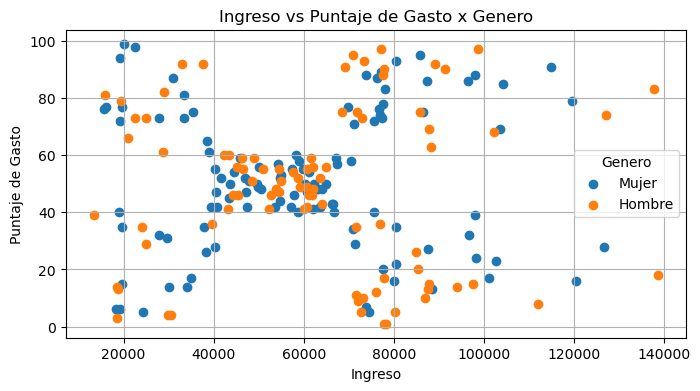

In [3]:
print (datos.groupby('Genero').describe())

def diagrama_dispersion (variable):
    plt.figure(figsize=(8, 4))

    # Graficar los puntos para cada género
    for genero in datos[variable].unique():
        subset = datos[datos[variable] == genero]
        plt.scatter(
            x=subset['Ingreso'], 
            y=subset['Puntaje_Gasto'], 
            label=genero
        )

    # Añadir etiquetas y título
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje de Gasto')
    plt.title(f'Ingreso vs Puntaje de Gasto x {variable}')

    # Añadir leyenda
    plt.legend(title=variable)

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()
    
diagrama_dispersion ('Genero')

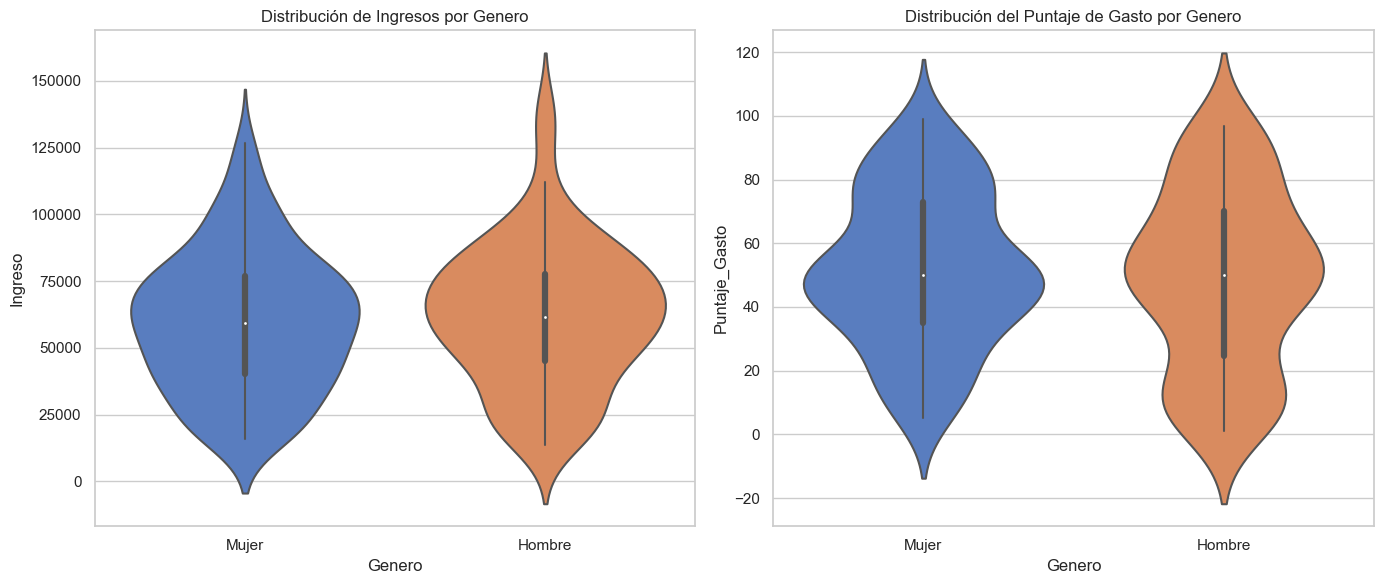

In [4]:
sns.set(style="whitegrid")

def grafico_violin (variable):
    plt.figure(figsize=(14, 6))

    # Primer subplot para 'Ingreso'
    plt.subplot(1, 2, 1)
    sns.violinplot(x=variable, y='Ingreso', data=datos, palette="muted")
    plt.title(f'Distribución de Ingresos por {variable}')

    # Segundo subplot para 'Puntaje_Gasto'
    plt.subplot(1, 2, 2)
    sns.violinplot(x=variable, y='Puntaje_Gasto', data=datos, palette="muted")
    plt.title(f'Distribución del Puntaje de Gasto por {variable}')

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

grafico_violin('Genero')   

In [5]:
def grupos_edad(edad):
    if edad < 25:
        return '18-24'
    elif 25 <= edad < 35:
        return '25-34'
    elif 35 <= edad < 45:
        return '35-44'
    elif 45 <= edad < 55:
        return '45-54'
    elif 55 <= edad < 65:
        return '55-64'
    else:
        return '65+'

# Aplicar la clasificación al DataFrame
datos['Grupo_Etario'] = datos['Edad'].apply(grupos_edad)

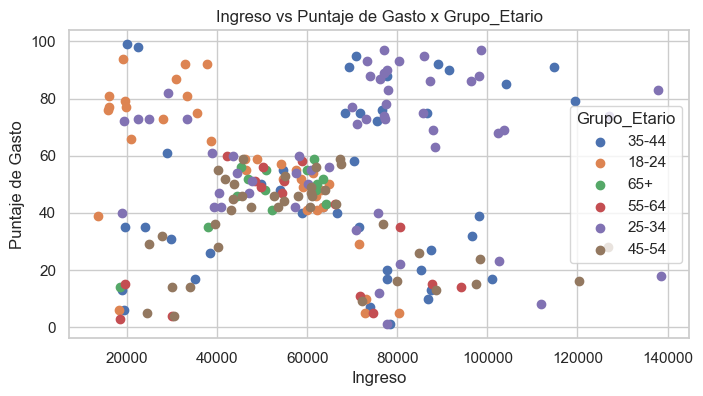

In [6]:
diagrama_dispersion ('Grupo_Etario')

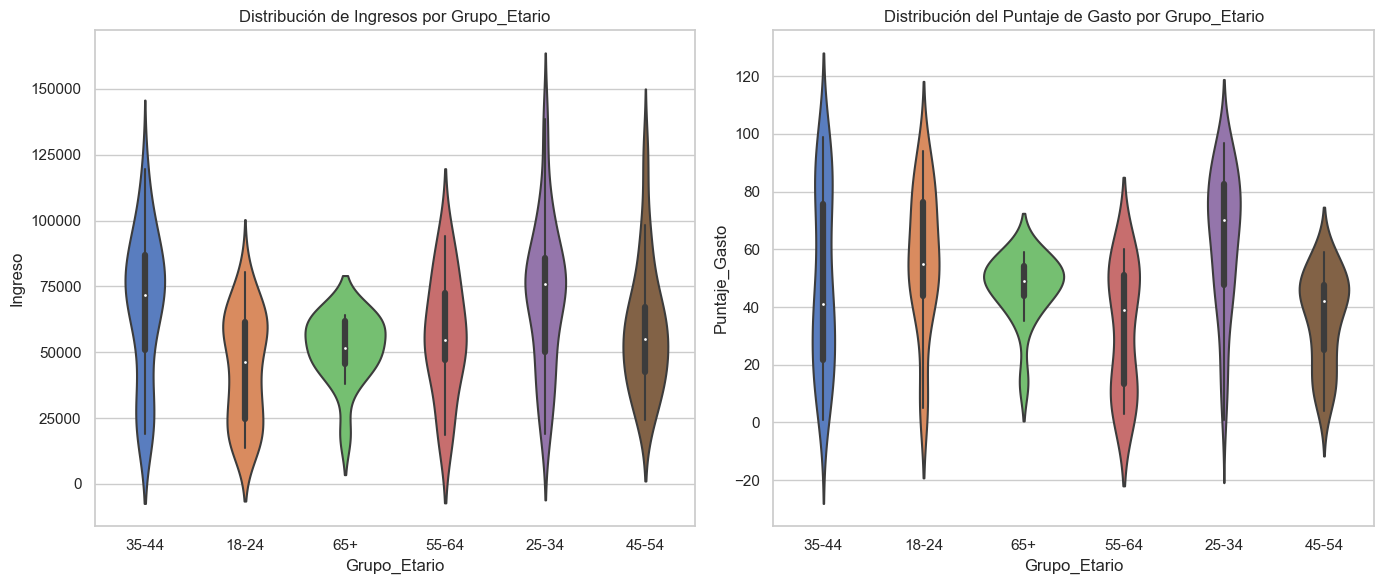

In [7]:
grafico_violin('Grupo_Etario')

(Utilice este espacio para describir su procedimiento)

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [8]:
# Utilice este espacio para escribir el código.
from sklearn.preprocessing import StandardScaler
import numpy as np

X = datos[['Ingreso', 'Puntaje_Gasto']]

# Estandarizar
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Convertir el array estandarizado de vuelta a un DataFrame
X = pd.DataFrame(X,columns=['Ingreso', 'Puntaje_Gasto'])
X.head(5)

,Ingreso,Puntaje_Gasto
0,1.431094,-0.434801
1,-0.960650,0.962775
2,-0.028719,0.186343
3,-0.462474,0.031057
4,-0.618133,0.147522


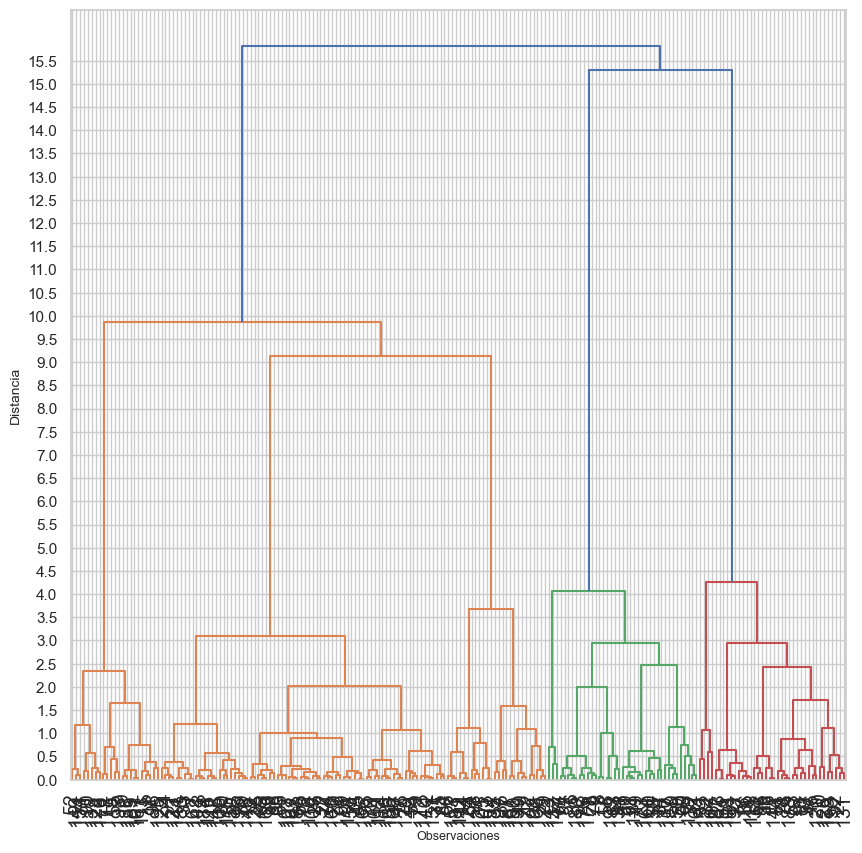

In [9]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')


fig, ax = plt.subplots(figsize=(10, 10))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 16, 0.5))
ax.set_ylabel('Distancia', fontsize=10)
plt.show()

(Utilice este espacio para describir su procedimiento)

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Número de clusters a una distancia de corte de 6: 5


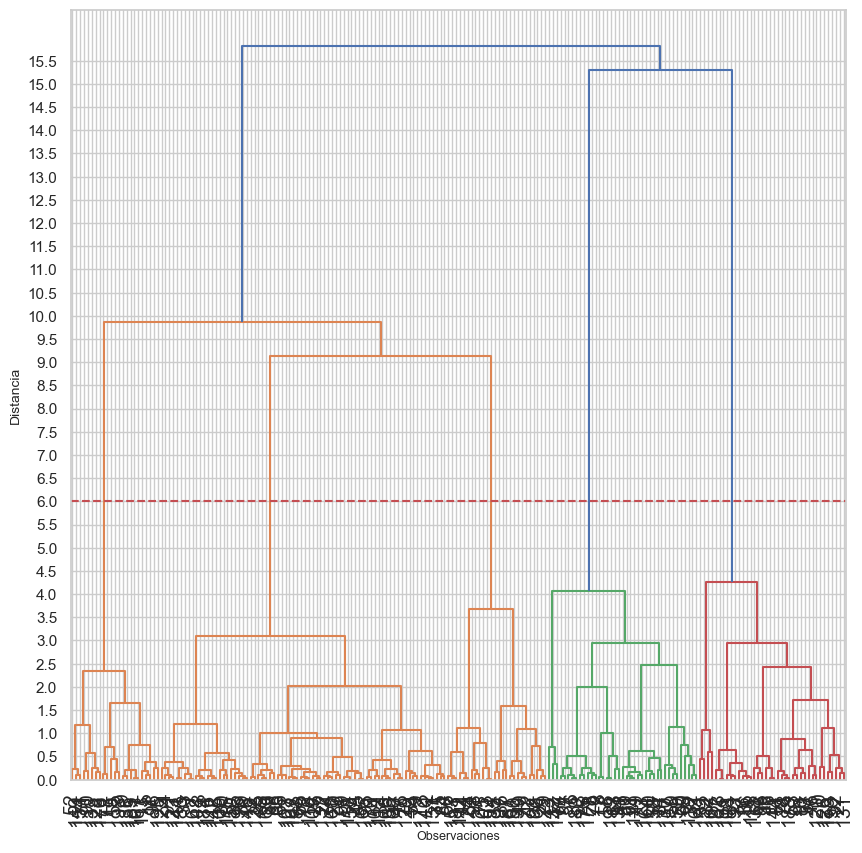

In [10]:
# Utilice este espacio para escribir el código.
corte = 6

distances = linkage(X, method="ward", metric="euclidean")
clusters = fcluster(distances, corte, criterion="distance")

# Número de clusters
num_clusters = len(set(clusters))
print(f'Número de clusters a una distancia de corte de 6: {num_clusters}')

fig, ax = plt.subplots(figsize=(10, 10))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)

ax.axhline(y=corte, color='r', linestyle='--', label=f'Distancia de corte = {corte}')

ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 16, 0.5))
ax.set_ylabel('Distancia', fontsize=10)
plt.show()

(Utilice este espacio para describir su procedimiento)

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

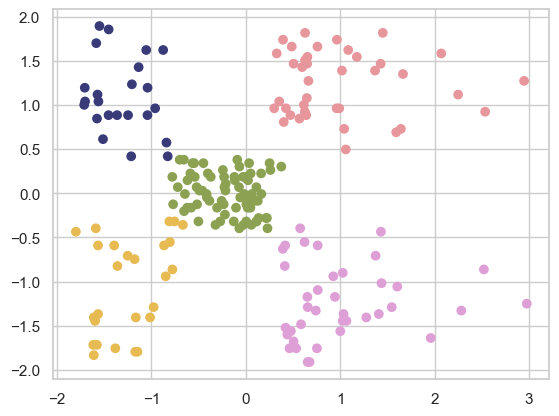

In [11]:
# Utilice este espacio para escribir el código.

from scipy.cluster.hierarchy import linkage

plt.scatter(X['Ingreso'], X['Puntaje_Gasto'], c=clusters, cmap='tab20b')
plt.show()

(Utilice este espacio para describir su procedimiento)

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [12]:
# !pip install kneed

In [13]:
# Utilice este espacio para escribir el código.

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def definir_eps (neighbors):
    
    neigh = NearestNeighbors(n_neighbors = neighbors)
    nbrs = neigh.fit(X)
    distancias, indices = nbrs.kneighbors(X)
    distancias = np.sort(distancias.flatten())
    fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y = 0.5, color = 'r', linestyle = '--')
    plt.plot(distancias)
    
    i = np.arange(len(distancias))
    knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    eps = distancias[knee.knee]
    print(eps)
    
    return eps


In [14]:
from sklearn.cluster import DBSCAN

def metodo_dbscan (epsilon, min_samples,data,metric='euclidean'):
    db = DBSCAN(eps = epsilon, min_samples = min_samples,metric=metric).fit(data)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(data).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 'Ingreso'], 
                y = resultado.loc[resultado.Cluster == k, 'Puntaje_Gasto']
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 'Ingreso'], 
                y = resultado.loc[resultado.Cluster == k, 'Puntaje_Gasto'],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.3f' % (n_clusteres, epsilon))

0.4934968313866966


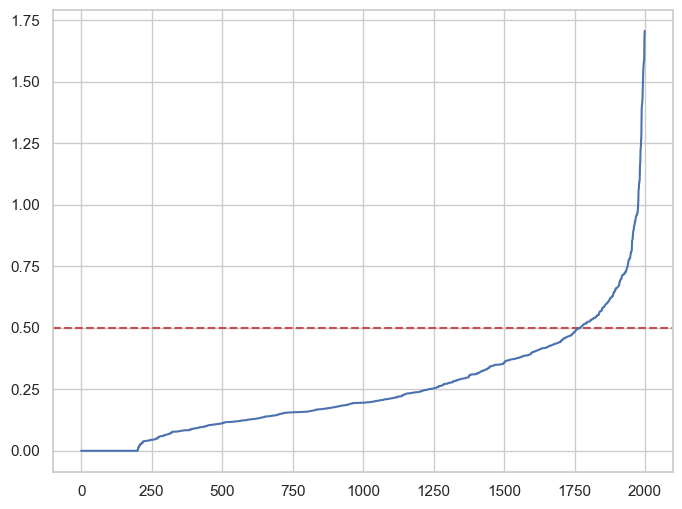

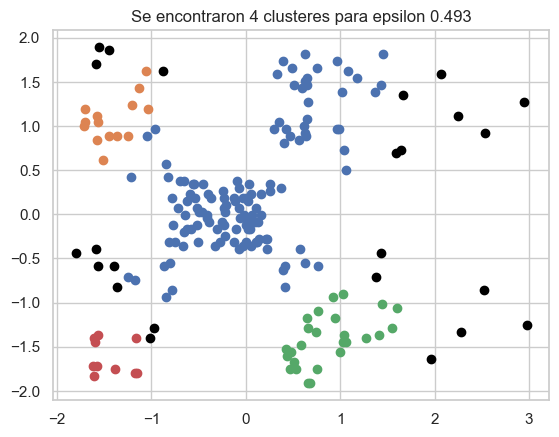

In [15]:
n =10
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1,n,X)

0.3101533404590082


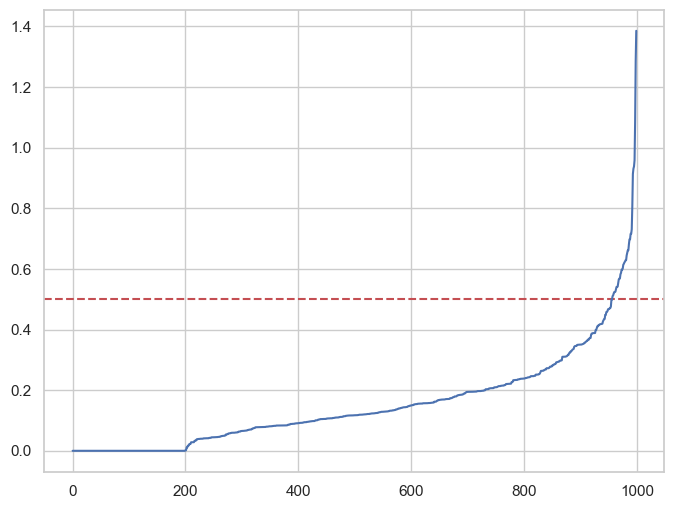

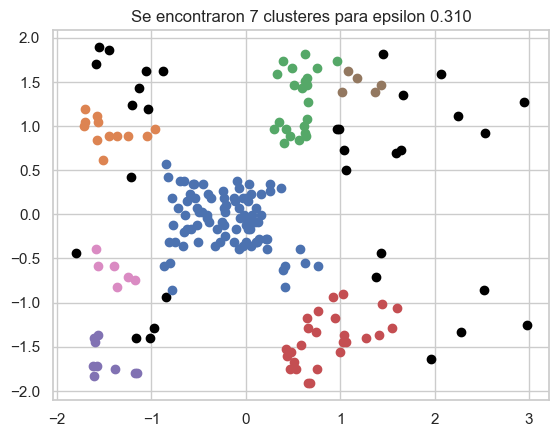

In [16]:
n =5
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1, n,X)

0.7332899728300047


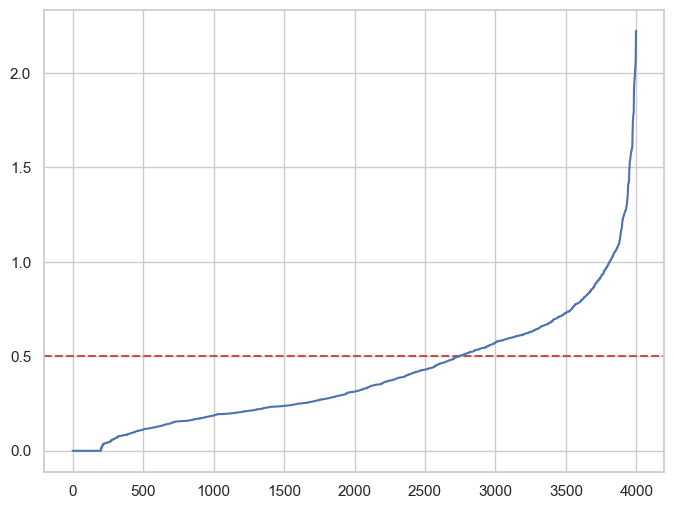

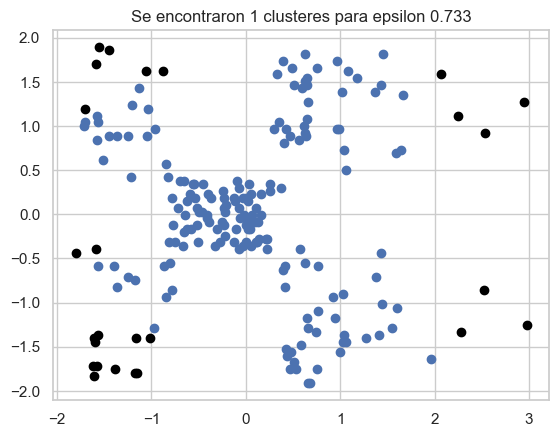

In [17]:
n =20
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1, n, X)

(Utilice este espacio para describir su procedimiento)

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [18]:
# !pip install gower

In [19]:
# Utilice este espacio para escribir el código.

X_g = datos[['Ingreso','Puntaje_Gasto','Genero','Grupo_Etario']]

#Dummies
#X_g= pd.get_dummies(X_g, columns=['Genero', 'Grupo_Etario'], drop_first=True)
X_g['Grupo_Etario'].astype(str)
X_g['Genero'].astype(str)

# Estandarizar
scaler = StandardScaler()
X_g = X_g.copy()
X_g[['Ingreso', 'Puntaje_Gasto']] = scaler.fit_transform(X_g[['Ingreso', 'Puntaje_Gasto']])



import gower

distance_matrix = gower.gower_matrix(X_g)
distance_matrix = pd.DataFrame(distance_matrix)
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.467024,0.367225,0.629724,0.395525,0.733005,0.381504,0.654588,0.582437,0.503569,...,0.299865,0.386479,0.152487,0.637416,0.724295,0.491610,0.374453,0.408111,0.435238,0.114951
1,0.467024,0.000000,0.349799,0.587300,0.321499,0.526185,0.335520,0.312435,0.651502,0.036545,...,0.516888,0.774423,0.380864,0.503077,0.690945,0.289892,0.342571,0.624760,0.031786,0.352072
2,0.367225,0.349799,0.000000,0.532907,0.283402,0.615780,0.332659,0.537363,0.618029,0.386344,...,0.417090,0.674624,0.366894,0.653278,0.688703,0.374385,0.308248,0.622518,0.318013,0.354314
3,0.629724,0.587300,0.532907,0.000000,0.515800,0.353281,0.615567,0.274864,0.400937,0.623845,...,0.679589,0.437123,0.583987,0.415777,0.405795,0.611886,0.525341,0.339611,0.555514,0.637222
4,0.395525,0.321499,0.283402,0.515800,0.000000,0.337481,0.116061,0.516446,0.401431,0.358044,...,0.195389,0.702924,0.333493,0.681578,0.655301,0.096085,0.274847,0.589117,0.289713,0.387716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.491610,0.289892,0.374385,0.611886,0.096085,0.263707,0.120310,0.587022,0.426088,0.263551,...,0.291475,0.799009,0.405450,0.777663,0.695887,0.000000,0.367157,0.603908,0.306372,0.391965
196,0.374453,0.342571,0.308248,0.525341,0.274847,0.608552,0.390908,0.541293,0.676278,0.379116,...,0.424318,0.681852,0.308646,0.660506,0.380454,0.367157,0.000000,0.564270,0.310785,0.412563
197,0.408111,0.624760,0.622518,0.339611,0.589117,0.348575,0.705178,0.355563,0.490548,0.615867,...,0.687567,0.195101,0.301542,0.423755,0.341979,0.603908,0.564270,0.000000,0.605526,0.476833
198,0.435238,0.031786,0.318013,0.555514,0.289713,0.547767,0.349652,0.280649,0.635022,0.068331,...,0.485102,0.742637,0.349902,0.471291,0.671710,0.306372,0.310785,0.605526,0.000000,0.371307


In [20]:
def find_knee_points(data, n_neighbors_list, metric):
    knee_values = []
    
    plt.figure(figsize=(10, 6), dpi=100)
    
    for n in n_neighbors_list:
        neigh = NearestNeighbors(n_neighbors=n, metric = metric)
        nbrs = neigh.fit(data)
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())
        
        # Calculo de rodilla
        i = np.arange(len(distancias))
        knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        knee_value = round(distancias[knee.knee],3)
        knee_values.append(knee_value)
        
        # Generate a color for the line
        line_color = next(plt.gca()._get_lines.prop_cycler)['color']
        
        plt.plot(distancias, label=f'n_neighbors = {n}', color=line_color)
        plt.axhline(y=knee_value, color=line_color, linestyle='--', label=f'Knee at {n} = {knee_value:.3f}')
    
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Knee Point Analysis for Different n_neighbors')
    plt.legend()
    plt.show()
    
    return knee_values

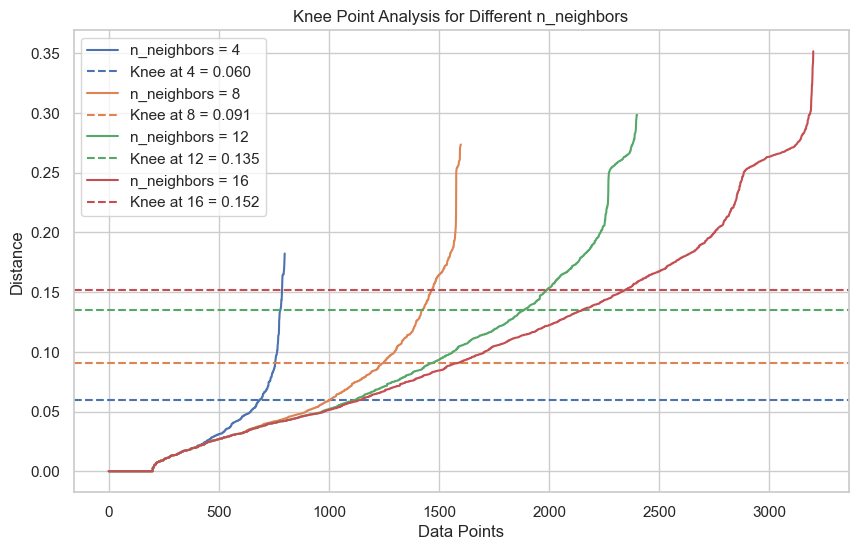

Puntos de rodilla encontrados para diferentes numeros de vecinos:
 [0.06, 0.091, 0.135, 0.152]


In [21]:
n_neighbors_l = [4,8,12,16]  
epsilon_list_precomputed = find_knee_points(distance_matrix, n_neighbors_l, metric = 'precomputed')
print('Puntos de rodilla encontrados para diferentes numeros de vecinos:\n', epsilon_list_precomputed)

In [22]:
def plot_dbscan_across_epsilons_2(data, epsilon, min_samples, metric='euclidean'):
    # Aplicar DBSCAN con los parámetros proporcionados
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric).fit(data)
    cluster_labels = db.labels_
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    
    print(f'Para eps = {epsilon} y min_samples = {min_samples}:')
    print(f'Número de clusters: {n_clusters}')
    
    # Crear DataFrame con clusters
    resultado = pd.DataFrame(X_g.copy()).assign(Cluster=cluster_labels)
    
    # Estadísticas descriptivas por cluster

    cluster_summary = resultado.groupby('Cluster').agg({
    'Ingreso': ['count', 'mean'],
    'Puntaje_Gasto': 'mean',
    'Genero': lambda x: x.value_counts().to_dict(),  # Conteo por género
    'Grupo_Etario': lambda x: x.value_counts().to_dict()  # Conteo por grupo etario
    })
    
    #print("\nResumen descriptivo por cluster:")
    #print(cluster_summary)
    
    # Graficar clusters
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(cluster_labels):
        if cluster == -1:
            color = 'black'
        else:
            color = plt.cm.tab10(cluster % 10)  # Usar colormap para colores de clusters
        
        cluster_data = resultado[resultado['Cluster'] == cluster]
        plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')
    
    plt.xlabel('Ingreso (Estandarizado)')
    plt.ylabel('Puntaje de Gasto (Estandarizado)')
    plt.title(f'DBSCAN Clustering with eps={epsilon} and min_samples={min_samples}')
    plt.legend()
    plt.show()
    
    return cluster_summary

In [23]:
def plot_cluster_characteristics(cluster_summary):
    # Preparar datos para gráficos apilados
    gender_data = {}
    age_data = {}

    # Agregar datos de género
    for cluster in cluster_summary.index:
        if ('Genero', '<lambda>') in cluster_summary.columns:
            gender_counts = cluster_summary.loc[cluster, ('Genero', '<lambda>')]
            for gender, count in gender_counts.items():
                if gender not in gender_data:
                    gender_data[gender] = {}
                gender_data[gender][cluster] = count

    # Agregar datos de grupo etario
    for cluster in cluster_summary.index:
        if ('Grupo_Etario', '<lambda>') in cluster_summary.columns:
            age_counts = cluster_summary.loc[cluster, ('Grupo_Etario', '<lambda>')]
            for age_group, count in age_counts.items():
                if age_group not in age_data:
                    age_data[age_group] = {}
                age_data[age_group][cluster] = count

    # Convertir a DataFrames para gráficos apilados
    gender_df = pd.DataFrame(gender_data).fillna(0).astype(int)
    age_df = pd.DataFrame(age_data).fillna(0).astype(int)

    # Graficar la distribución de género
    plt.figure(figsize=(12, 6))
    gender_df.plot(kind='bar', stacked=True, colormap='tab10')
    plt.title('Distribución de Género en Todos los Clusters')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    # Graficar la distribución de grupo etario
    plt.figure(figsize=(12, 6))
    age_df.plot(kind='bar', stacked=True, colormap='tab20')
    plt.title('Distribución de Grupo Etario en Todos los Clusters')
    plt.xlabel('Grupo Etario')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    # Graficar la media de Ingreso por cluster
    plt.figure(figsize=(12, 6))
    ingreso_means = cluster_summary['Ingreso']['mean']
    ingreso_means.plot(kind='bar', color='skyblue')
    plt.title('Media de Ingreso por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Media de Ingreso (Estandarizado)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Graficar la media de Puntaje de Gasto por cluster
    plt.figure(figsize=(12, 6))
    puntaje_gasto_means = cluster_summary['Puntaje_Gasto']['mean']
    puntaje_gasto_means.plot(kind='bar', color='lightgreen')
    plt.title('Media de Puntaje de Gasto por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Media de Puntaje de Gasto (Estandarizado)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Para eps = 0.05999999865889549 y min_samples = 4:
Número de clusters: 15


C:\Users\User\AppData\Local\Temp\ipykernel_20088\2607019290.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


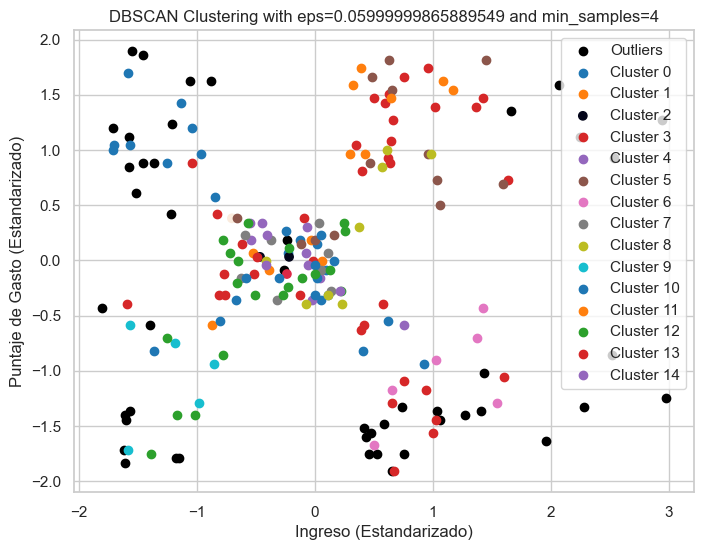

<Figure size 1200x600 with 0 Axes>

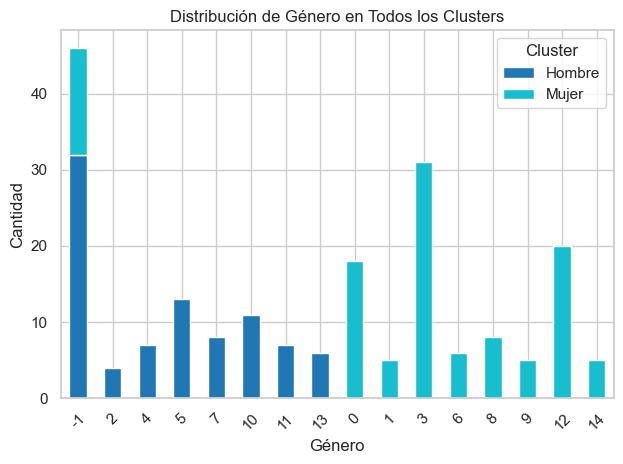

<Figure size 1200x600 with 0 Axes>

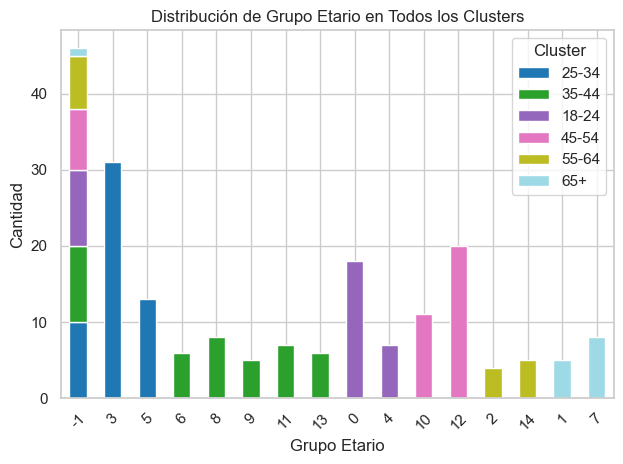

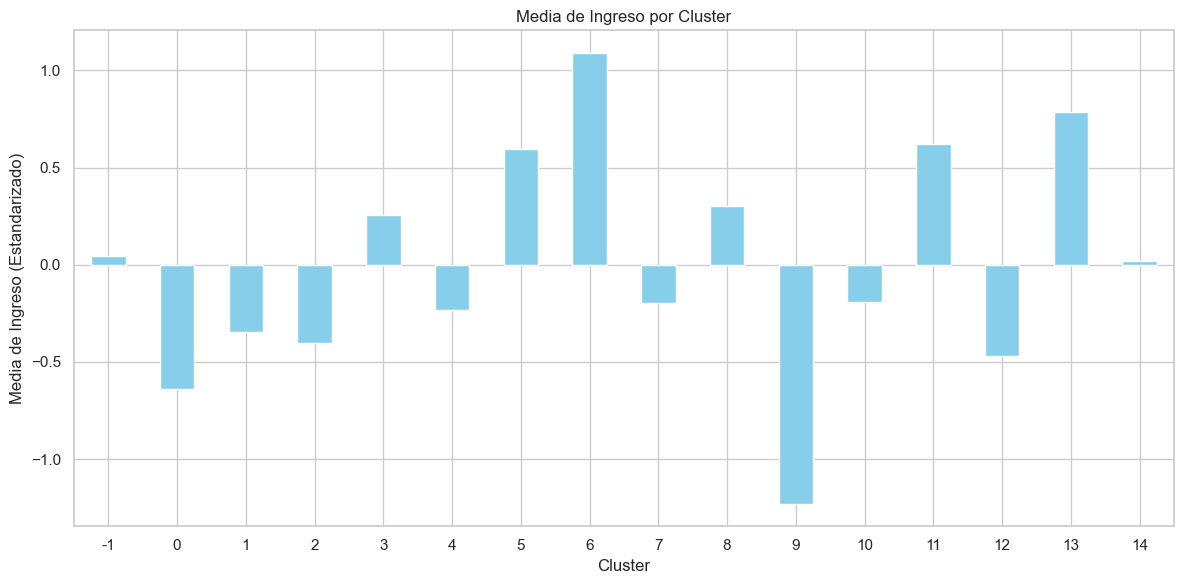

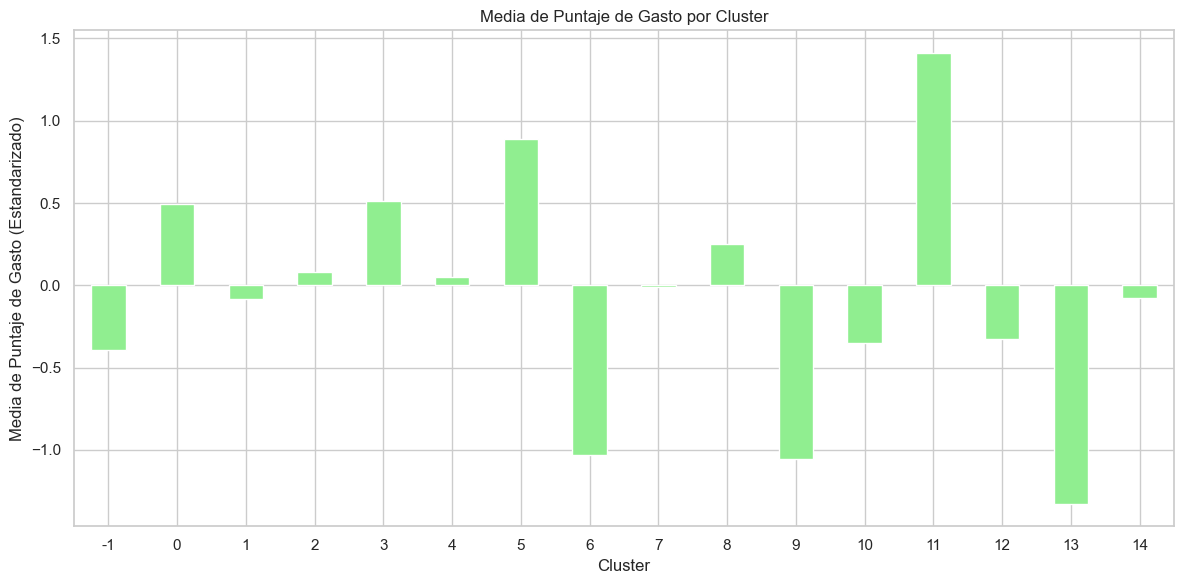

In [24]:
dbscan_gower_1 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[0], 
                                                n_neighbors_l[0],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_1)

Para eps = 0.09099999815225601 y min_samples = 8:
Número de clusters: 9


C:\Users\User\AppData\Local\Temp\ipykernel_20088\2607019290.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


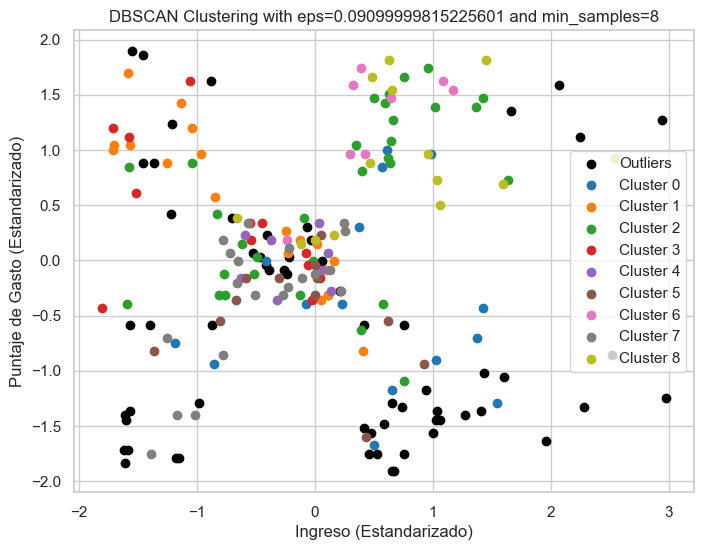

NameError: name 'dbscan_gower_3' is not defined

In [25]:
dbscan_gower_2 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[1], 
                                                n_neighbors_l[1],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_3)

In [ ]:
dbscan_gower_3 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[2], 
                                                n_neighbors_l[2],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_3)

In [ ]:
dbscan_gower_4 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[3], 
                                                n_neighbors_l[3],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_4)

(Utilice este espacio para describir su procedimiento)